In [1]:
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
import os
from shapely.geos import lgeos
from MTIPmapping import *

C:\Users\clid1852\AppData\Anaconda3\envs\geoenv\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path = r'T:\MPO\TIP\TIP FY24-27\Maps\Data'

In [3]:
data = pd.read_excel(r'T:\MPO\TIP\TIP FY24-27\Maps\20221215 DRAFT MTIP24_27_List_IDs.xlsx')

In [4]:
data.columns

Index(['Geo', 'Project Name', 'MTIP ID #', 'Project Description', 'Work Type',
       'Perf. Meas.', 'RTP Project Number / Ref.', 'In AQ CATS?', 'In\nAQMA?',
       'Air Quality Status', 'STIP Key', 'FFY', 'Phase', 'Phase Status',
       'Federal Funding ', 'Federal Funding Source', 'Federal Req. Match',
       'Federal Req. Match Source', 'Total Fed+ Req Match', 'Other Funding',
       'Other Funding Source', 'Total All Sources', 'AQ Exempt?', 'AQ Status',
       'IAC', 'Senator District', 'Representative District', 'ID'],
      dtype='object')

In [5]:
newpts = pd.read_excel(path+'\\NewData20230127.xlsx')

In [6]:
newpts.columns

Index(['Project Name', 'STIP Key', 'LatLon'], dtype='object')

In [7]:
newpts.loc[:, 'Longitude'] = newpts.LatLon.apply(lambda x: getLonLat(x)[1])
newpts.loc[:, 'Latitude'] = newpts.LatLon.apply(lambda x: getLonLat(x)[0])

In [8]:
newpts.drop('LatLon', axis=1, inplace=True)

In [9]:
newpts

,Project Name,STIP Key,Longitude,Latitude
0,"Ferry St over SPRR, 4th, 6th, 7th Aves (City o...",23121,-123.086188,44.0544559
1,I-5: NB McKenzie overflow bridge (MP 196.19),23131,-123.045245,44.094775
2,I-5: NB McKenzie overflow bridge (MP 196.69),23130,-123.044359,44.101991
3,I-5: Northbound Muddy Creek bridge (Lane County),23128,-123.056861,44.156434
4,OR569: Beltline ramp signal replacement at MP ...,22796,-123.091053,44.089546


In [10]:
# those are new projects
[key for key in newpts['STIP Key'].values if key in data['STIP Key'].values]

[]

In [11]:
data.head(3)

,Geo,Project Name,MTIP ID #,Project Description,Work Type,Perf. Meas.,RTP Project Number / Ref.,In AQ CATS?,In\nAQMA?,Air Quality Status,...,Total Fed+ Req Match,Other Funding,Other Funding Source,Total All Sources,AQ Exempt?,AQ Status,IAC,Senator District,Representative District,ID
0,Central Lane MPO,Central Lane MPO planning SFY25,191003.0,Central Lane MPO planning funds for Federal fi...,PL,--,--,NaN,NaN,EXEMPT / Other-Planning and Technical Studies ...,...,630235.00,NaN,NaN,630235.00,Yes,Other-Planning and Technical Studies,IAC conf 4/26/20,NaN,NaN,NaN
1,Central Lane MPO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189247.75,NaN,NaN,189247.75,NaN,NaN,NaN,NaN,NaN,NaN
2,Central Lane MPO,Central Lane MPO planning SFY26,230501.0,Planning funds for projects identified in stat...,PL,--,--,NaN,NaN,EXEMPT / Other-Planning and Technical Studies,...,832887.52,NaN,NaN,832887.52,Yes,Other-Planning and Technical Studies,NaN,NaN,NaN,NaN


In [12]:
# check the last number assigned for ID
a = data.ID.unique()
int(max(a[~np.isnan(a)]))

36

In [13]:
startNm = int(max(a[~np.isnan(a)])) + 1

In [14]:
newpts['ID'] = list(range(startNm, startNm + newpts.shape[0]))

In [15]:
gdf = gpd.GeoDataFrame(newpts, geometry=gpd.points_from_xy(newpts.Longitude, newpts.Latitude))

In [16]:
gdf

,Project Name,STIP Key,Longitude,Latitude,ID,geometry
0,"Ferry St over SPRR, 4th, 6th, 7th Aves (City o...",23121,-123.086188,44.0544559,37,POINT (-123.08619 44.05446)
1,I-5: NB McKenzie overflow bridge (MP 196.19),23131,-123.045245,44.094775,38,POINT (-123.04524 44.09477)
2,I-5: NB McKenzie overflow bridge (MP 196.69),23130,-123.044359,44.101991,39,POINT (-123.04436 44.10199)
3,I-5: Northbound Muddy Creek bridge (Lane County),23128,-123.056861,44.156434,40,POINT (-123.05686 44.15643)
4,OR569: Beltline ramp signal replacement at MP ...,22796,-123.091053,44.089546,41,POINT (-123.09105 44.08955)


In [17]:
points = gpd.read_file(os.path.join(path, 'FY24_27_points.shp'))

In [18]:
gdf.rename(columns={'STIP Key':'STIP_Key'}, inplace=True)

In [19]:
gdf.crs is None

True

In [20]:
gdf = gdf.set_crs('epsg:4326')

In [21]:
gdf = gdf.to_crs(epsg=2992)

In [22]:
points_added = points.append(gdf[points.columns], ignore_index=True)

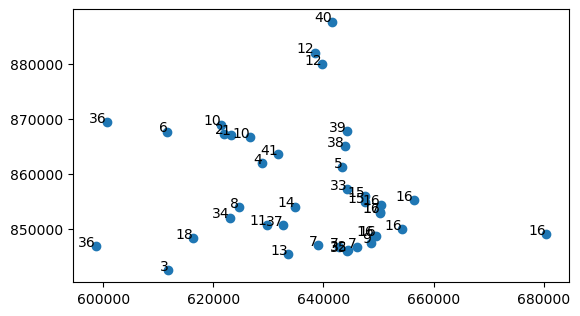

In [23]:
df = points_added
ax = df.plot()
df.apply(lambda x: ax.annotate(text=x['ID'], xy=x.geometry.coords[0], ha='right'), axis=1);

In [24]:
#%pip install shapely==1.8.5

In [29]:
pointdata = get_district_IDs(dat=gdf, shptype='point', keycol='STIP_Key', 
                             colnm1='Senator District', colnm2='Representative District')

In [31]:
pointdata.to_csv(path+'\\new_points_districtIDs_20230127.csv', index=False)

In [33]:
points_added.to_file(os.path.join(path, 'FY24_27_points.shp'))